### clustering practice with SpectralClustering

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#!pip install seaborn

In [4]:
df = pd.read_csv(r'E:\clustering\country_data\Country-data.csv')

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.shape

(167, 10)

In [10]:
df.describe().round(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.80,1330.00
50%,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00
max,208.00,200.00,17.90,174.00,125000.00,104.00,82.80,7.49,105000.00


In [14]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [19]:
x = df.iloc[:,1:].values

#### kmeans

In [24]:
!pip install scikit-learn

In [34]:
from sklearn.cluster import KMeans
elbow = []

In [35]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    elbow.append(kmeans.inertia_)

In [36]:
print(elbow)

[117459687469.0782, 36528387934.322105, 21710210039.754147, 14610713446.535133, 10665874358.647745, 7688785599.582989, 5353767457.732319, 4260514816.1154, 3235328135.556936, 2662664687.013526]


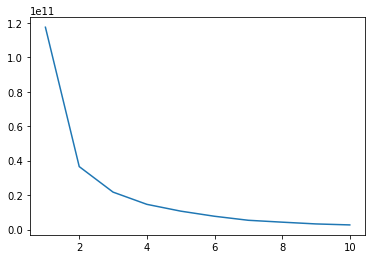

In [37]:
plt.plot(range(1,11), elbow)

In [48]:
#applying kmeans with 4 clusters

kmeans = KMeans(n_clusters=4, init='k-means++')
y_kmeans = kmeans.fit_predict(x)

In [49]:
y_kmeans

array([0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 2, 3, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 3, 2, 0, 0, 0, 0, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 0, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0])

In [50]:
pd.concat([df,pd.DataFrame(y_kmeans)], axis=1)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


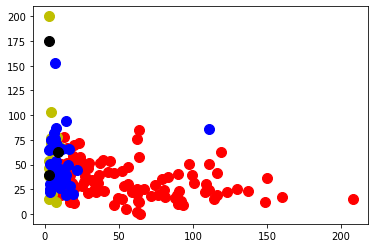

In [51]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0,1], s=100, c='r')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1,1], s=100, c='y')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2,1], s=100, c='b')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3,1], s=100, c='k')

In [47]:
from sklearn.metrics import silhouette_score

In [52]:
silhouette_score(x, y_kmeans)

0.6109297437247547

In [53]:
#attempting kmeans with 3 clusters

kmeans = KMeans(n_clusters=3, init='k-means++')
y_kmeans = kmeans.fit_predict(x)

In [54]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

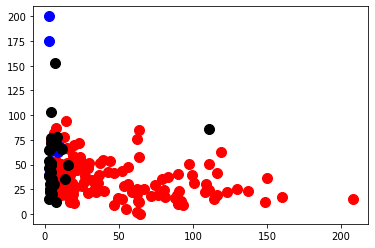

In [55]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0,1], s=100, c='r')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1,1], s=100, c='b')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2,1], s=100, c='k')

In [56]:
from sklearn.metrics import silhouette_score
silhouette_score(x, y_kmeans)

0.7003508054481694

In [57]:
# attempting kmeans clustering with 2 clusters

kmeans = KMeans(n_clusters=2, init='k-means++')
y_kmeans = kmeans.fit_predict(x)

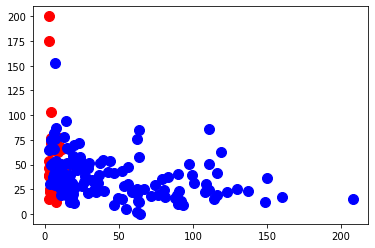

In [58]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0,1], s=100, c='r')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1,1], s=100, c='b')

In [59]:
silhouette_score(x, y_kmeans)

0.7256314906273207

#### agglomerative clustering

In [60]:
import scipy.cluster.hierarchy as sch

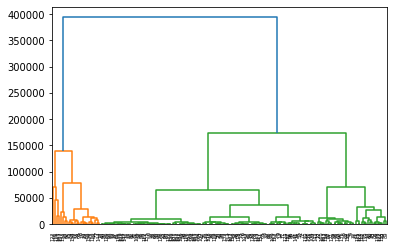

In [61]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

In [62]:
# applying agglomerative clustering with 3 clusters

from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_agg = agg.fit_predict(x)

In [63]:
y_agg

array([2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2,
       2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2], dtype=int64)

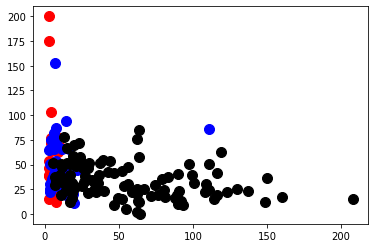

In [64]:
plt.scatter(x[y_agg==0, 0], x[y_agg==0,1], s=100, c='r')
plt.scatter(x[y_agg==1, 0], x[y_agg==1,1], s=100, c='b')
plt.scatter(x[y_agg==2, 0], x[y_agg==2,1], s=100, c='k')

In [65]:
silhouette_score(x, y_agg)

0.5963166959187518

In [66]:
# applying agglomerative clustering with 2 clusters

from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_agg = agg.fit_predict(x)

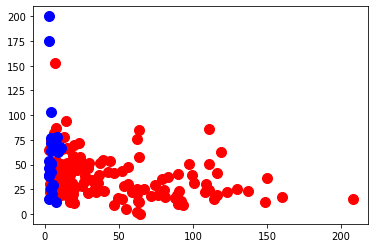

In [67]:
plt.scatter(x[y_agg==0, 0], x[y_agg==0,1], s=100, c='r')
plt.scatter(x[y_agg==1, 0], x[y_agg==1,1], s=100, c='b')

In [68]:
silhouette_score(x, y_agg)

0.7228222144066916

### SpectralClustering

In [69]:
from sklearn.cluster import SpectralClustering

In [78]:
#attempting apectralclustering with 3 clusters

spec = SpectralClustering(n_clusters=3, n_init=10)
y_spec = spec.fit_predict(x)

C:\Users\Sreeraj\.conda\envs\r-tutorial\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


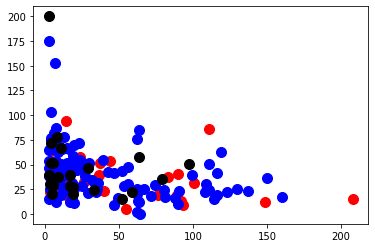

In [79]:
plt.scatter(x[y_spec==0, 0], x[y_spec==0,1], s=100, c='r')
plt.scatter(x[y_spec==1, 0], x[y_spec==1,1], s=100, c='b')
plt.scatter(x[y_spec==2, 0], x[y_spec==2,1], s=100, c='k')

In [80]:
silhouette_score(x, y_spec)

-0.11541463175770238

In [81]:
#attempting apectralclustering with 2 clusters

spec = SpectralClustering(n_clusters=2, n_init=20)
y_spec = spec.fit_predict(x)

C:\Users\Sreeraj\.conda\envs\r-tutorial\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


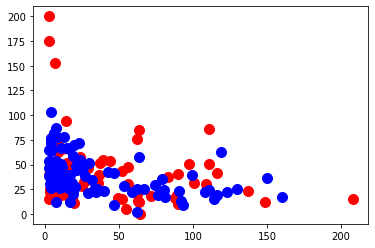

In [82]:
plt.scatter(x[y_spec==0, 0], x[y_spec==0,1], s=100, c='r')
plt.scatter(x[y_spec==1, 0], x[y_spec==1,1], s=100, c='b')

In [83]:
silhouette_score(x, y_spec)

-0.0009404378238054589